In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<Axes: ylabel='Frequency'>

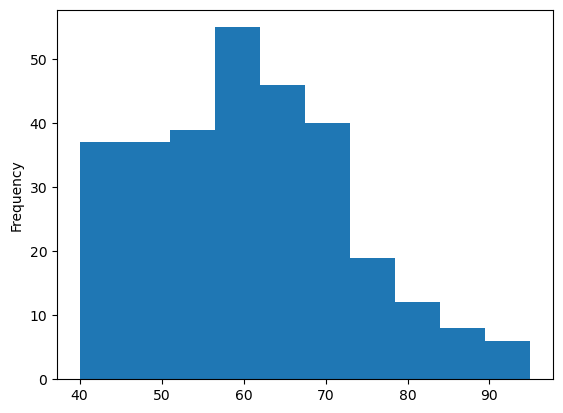

In [3]:
# 1  What is the distribution of age among heart failure patients in the dataset
data['age'].plot(kind = 'hist')

In [4]:
# 2  ´ How does the death rate vary with age

In [5]:
data['DEATH_EVENT'].corr(data['age'])

0.2537285430880036

In [6]:
# 3  What is the percentage of male and female patients in the dataset
data['sex'].value_counts(normalize=True) * 100

sex
1    64.882943
0    35.117057
Name: proportion, dtype: float64

![My Picture](picture1.png)


In [8]:
# 4
platelet_by_age_group = data.groupby('age')['platelets'].mean()
print(platelet_by_age_group)

age
40.000    262428.571429
41.000    374000.000000
42.000    244051.147143
43.000    237000.000000
44.000    249179.015000
45.000    331300.845263
46.000    294119.343333
47.000    130000.000000
48.000    165500.000000
49.000    286500.000000
50.000    257939.186296
51.000    290339.507500
52.000    307200.000000
53.000    291135.803000
54.000    207500.000000
55.000    272239.652353
56.000    133000.000000
57.000    288000.000000
58.000    245000.000000
59.000    238750.000000
60.000    249536.850303
60.667    295000.000000
61.000    231250.000000
62.000    231200.000000
63.000    255125.000000
64.000    265666.666667
65.000    257387.465000
66.000    202000.000000
67.000    239179.015000
68.000    247800.000000
69.000    199666.666667
70.000    258858.321200
72.000    316285.714286
73.000    211589.507500
75.000    254097.644545
77.000    314500.000000
78.000    379000.000000
79.000    172000.000000
80.000    233051.147143
81.000    231000.000000
82.000    189333.333333
85.000    30

In [11]:
# 5 

# Calculate the Pearson correlation coefficient between serum creatinine and sodium levels
correlation = data['serum_creatinine'].corr(data['serum_sodium'])
print(f"Correlation between serum creatinine and sodium levels: {correlation:.2f}")


Correlation between serum creatinine and sodium levels: -0.19


In [12]:
# 6

# Calculate the percentage of patients with high blood pressure by gender
high_bp_by_gender = data.groupby('sex')['high_blood_pressure'].mean() * 100
print(high_bp_by_gender)


sex
0    41.904762
1    31.443299
Name: high_blood_pressure, dtype: float64


In [14]:
# 7
smoking_impact = data.groupby('smoking')['DEATH_EVENT'].mean() * 100
print("Percentage of death events by smoking status:")
print(smoking_impact)

Percentage of death events by smoking status:
smoking
0    32.512315
1    31.250000
Name: DEATH_EVENT, dtype: float64


In [16]:
# 8
# Calculate the percentage of death events in each age group
death_events_by_age_group = data.groupby('age')['DEATH_EVENT'].mean() * 100
print("Percentage of death events by age group:")
print(death_events_by_age_group)


Percentage of death events by age group:
age
40.000      0.000000
41.000      0.000000
42.000     14.285714
43.000      0.000000
44.000      0.000000
45.000     31.578947
46.000     33.333333
47.000      0.000000
48.000    100.000000
49.000     25.000000
50.000     29.629630
51.000     25.000000
52.000      0.000000
53.000     10.000000
54.000     50.000000
55.000     17.647059
56.000      0.000000
57.000     50.000000
58.000     20.000000
59.000     75.000000
60.000     39.393939
60.667     50.000000
61.000      0.000000
62.000     20.000000
63.000      0.000000
64.000      0.000000
65.000     30.769231
66.000      0.000000
67.000      0.000000
68.000     40.000000
69.000     66.666667
70.000     28.000000
72.000     71.428571
73.000     25.000000
75.000     54.545455
77.000     50.000000
78.000      0.000000
79.000      0.000000
80.000     71.428571
81.000      0.000000
82.000    100.000000
85.000     50.000000
86.000    100.000000
87.000    100.000000
90.000     66.666667
94.000    

In [19]:
# 9

from scipy.stats import ttest_ind

# Split the data into groups based on diabetes status
with_diabetes = data[data['diabetes'] == 1]['ejection_fraction']
without_diabetes = data[data['diabetes'] == 0]['ejection_fraction']

# Perform a t-test to compare the mean ejection fraction
t_stat, p_val = ttest_ind(with_diabetes, without_diabetes)
print(f"T-test results for ejection fraction (with vs without diabetes): t-statistic = {t_stat:.2f}, p-value = {p_val:.2f}")


T-test results for ejection fraction (with vs without diabetes): t-statistic = -0.08, p-value = 0.93


In [20]:
# 10

# Split the data into groups based on survival (DEATH_EVENT)
survived = data[data['DEATH_EVENT'] == 0]['serum_creatinine']
not_survived = data[data['DEATH_EVENT'] == 1]['serum_creatinine']

# Perform a t-test to compare the mean serum creatinine levels
t_stat, p_val = ttest_ind(survived, not_survived)
print(f"T-test results for serum creatinine (survived vs not survived): t-statistic = {t_stat:.2f}, p-value = {p_val:.2f}")


T-test results for serum creatinine (survived vs not survived): t-statistic = -5.31, p-value = 0.00
